# Mall Customers Segmentation 

<img src="https://cache2.senatus.net/files/myerscms/senatus_xSo4PX.jpg">

For most companies, understand the customer's segmentation and implement the appropriate marketing strategy can boosting their source of income. By engaging in this activity, it means that the company should be using their historical data in order to know and categorize their customers based on several categories. From that, the company can do some strategic planning ahead such appropriately choose a marketing strategy that fitted with a customer's segmentation, how they approach the customers based on customer's age and gender or how to keep the customer's retention to still high.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',999)
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Count of Customers')

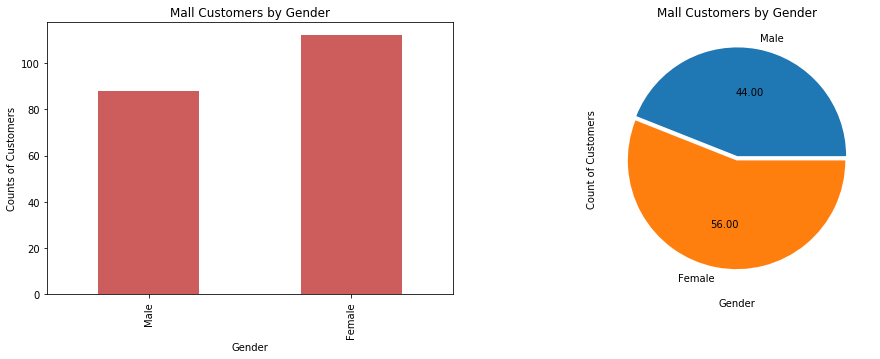

In [4]:
temp1 = data['Gender'].value_counts(ascending=True)

plt.figure(figsize=(16,11))
plt.subplot(221)
temp1.plot(kind='bar', color='indianred')
plt.title("Mall Customers by Gender")
plt.xlabel('Gender')
plt.ylabel('Counts of Customers')

plt.subplot(222)
temp1.plot(kind='pie', autopct='%.2f', explode=(.02,.02))
plt.title("Mall Customers by Gender")
plt.xlabel('Gender')
plt.ylabel('Count of Customers')

##### Insight

- From this bar and pie chart, we know the distribution of customer's gender in the mall.

- Interestingly, __The Females are in the lead with a share of 56% whereas the Males have a share of 44%__ as mall customers.

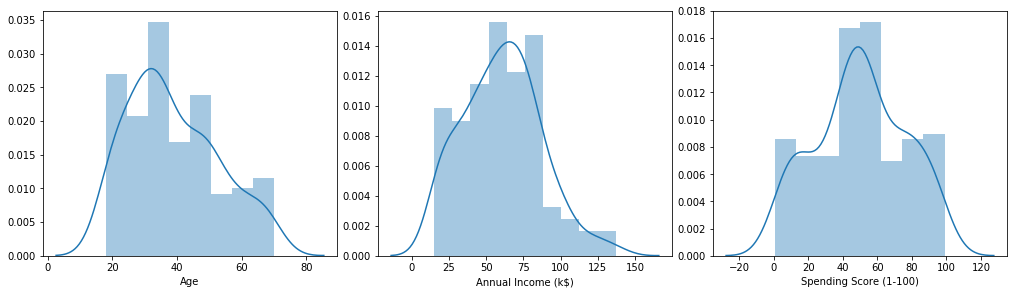

In [5]:
bx = data[['Age','Annual Income (k$)','Spending Score (1-100)']]
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4))
index = 0
axs = axs.flatten()
for k,v in bx.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### Insight

- In the three above plots, __we can see the distribution pattern of customer's age, annual income, and spending score by looking at the plots__.

- In the Customers Age plot, we can take information such as

> The most regular customers for the Mall is Middle-Aged people who have age around 30-35 years of age.
> Youngsters are lesser as compared to the Middle-aged people to visit the mall frequently.
> Older citizens are the least frequent visitor in the Mall.

- In the Annual Income plot, we can take information such as

> Most of the customers have an earning of around 50-75 US Dollars.
> There are only a few people who earn more than 100 US Dollars.
> Also, we can say that the least Income of the customers is around 20 US Dollars.

- In the Spending Score plot, we can take information such as

> Most of the people have a spending score of around 40-60.
> There are people who have spending scores only 1 and there are people who have a high spending score in 99.

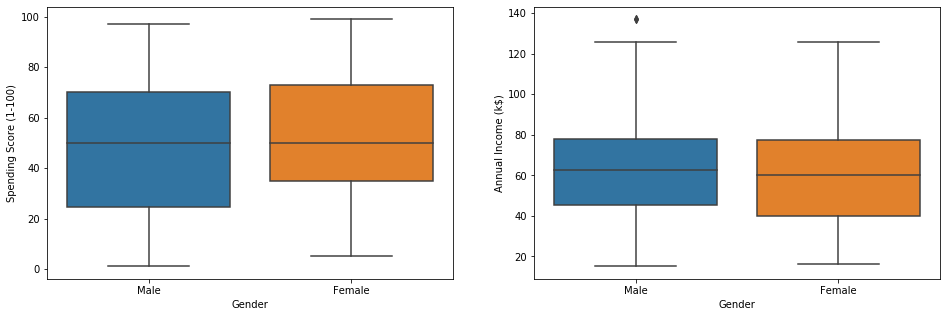

In [6]:
fig,axs = plt.subplots(ncols=2, nrows=1,figsize=(16, 5))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=data, ax=axs.flatten()[0])
sns.boxplot(x='Gender',y='Annual Income (k$)',data=data, ax=axs.flatten()[1])

##### Insight

- In the two above plots, __we can see and analyze the relations between gender and spending score, also analyze the relations between gender and annual income__.

- The relations between gender and spending score, we can gather information such as

> It is clearly visible that most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars. 
> The Females have a spending score of around 35k US Dollars to 75k US Dollars. 
> In this case, the women customers are Shopping Leaders.

- The relations between gender and annual income, we can gather information such as

> There are more numbers of males who get paid more than females.
> But in general, There are no significant differences in the data distribution between males and females in their annual income. 

### Finding the relation between Annual Income and Spending Score by Gender

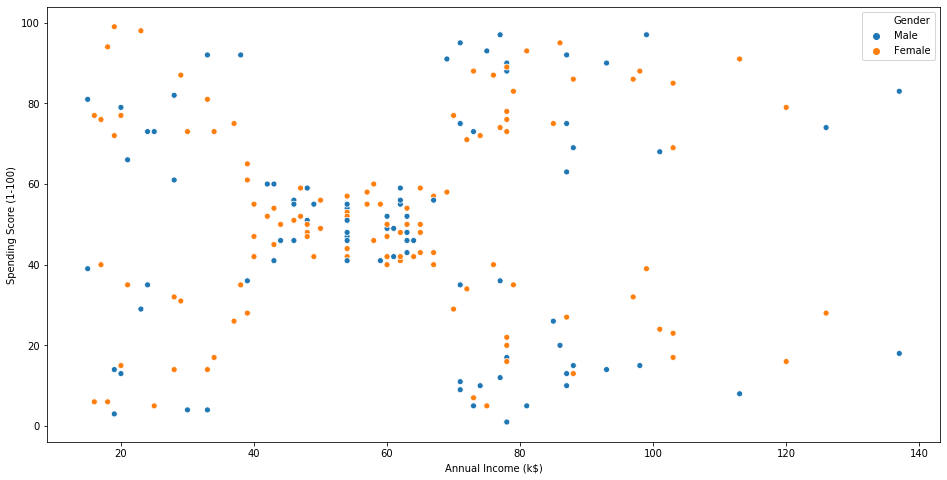

In [7]:
plt.subplots(figsize=(16,8))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=data)

##### Insight

- From this graph, we know that __the customer's annual income haven't linear relations with their spending score and a type of gender__.

- This information also shows that the customers who has highly spending score not only comes from someone who has a high income but also with customers low income. In order to categorize and see other details, we can use a clustering analysis below.

**Clustering Analysis** 

In [8]:
# We are considering Annual income and Spending Score as the features 
coba = data.iloc[:,[3,4]].values 

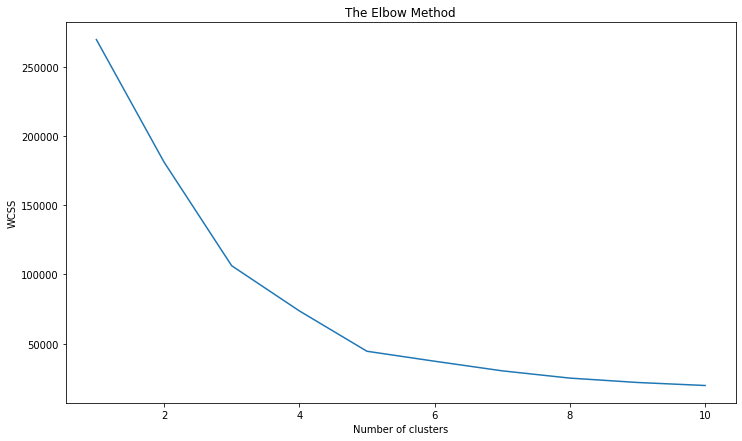

In [9]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(coba)
    wcss.append(kmeans.inertia_)
    
plt.subplots(figsize=(12,7))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(coba)

<function matplotlib.pyplot.show(*args, **kw)>

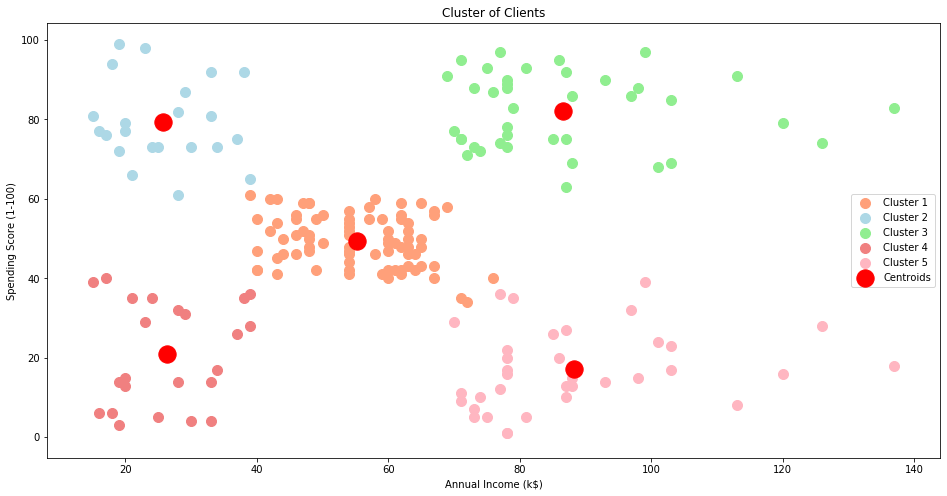

In [11]:
plt.subplots(figsize=(16,8))
plt.scatter(coba[y_kmeans==0,0],coba[y_kmeans==0,1],s=100,c='lightsalmon',label='Cluster 1')
plt.scatter(coba[y_kmeans==1,0],coba[y_kmeans==1,1],s=100,c='lightblue',label='Cluster 2')
plt.scatter(coba[y_kmeans==2,0],coba[y_kmeans==2,1],s=100,c='lightgreen',label='Cluster 3')
plt.scatter(coba[y_kmeans==3,0],coba[y_kmeans==3,1],s=100,c='lightcoral',label='Cluster 4')
plt.scatter(coba[y_kmeans==4,0],coba[y_kmeans==4,1],s=100,c='lightpink',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show

##### Insight

- This Clustering Analysis gives a clear insight into the different segments of the mall customers. There are clearly Five clusters of Customers based on their Annual Income and Spending Score which are the factors to determine the segments of a customer in a Mall.

- Cluster 1- Medium income medium spending = Target Customers

- Cluster 2- Low Income and high spending = Target Customers

- Cluster 3- High Income and high spending = Priority Customers

- Cluster 4- Low Income and low spending = Usual Customers

- Cluster 5- High income low spending = Target Customers

### Finding the relation between Age and Spending Score by Gender

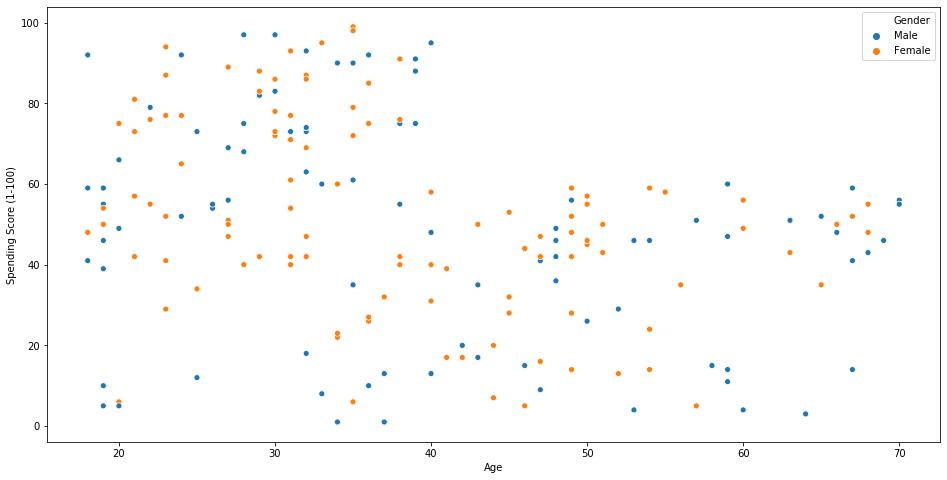

In [12]:
plt.subplots(figsize=(16,8))
sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Gender',data=data)

##### Insight

- From this graph, we know that __the customers tend to less consumptive on spending money based on their age__.

- This information also shows that the customers with a range of 18-40 years old tend to highly spend their money in the mall, whereas the older tend to less consumptive in their spending. In order to categorize and see other details, we can use a clustering analysis below.

**Clustering Analysis**

In [13]:
# We are considering Age and Spending Score as the features 
coba1 = data.iloc[:,[2,4]].values 

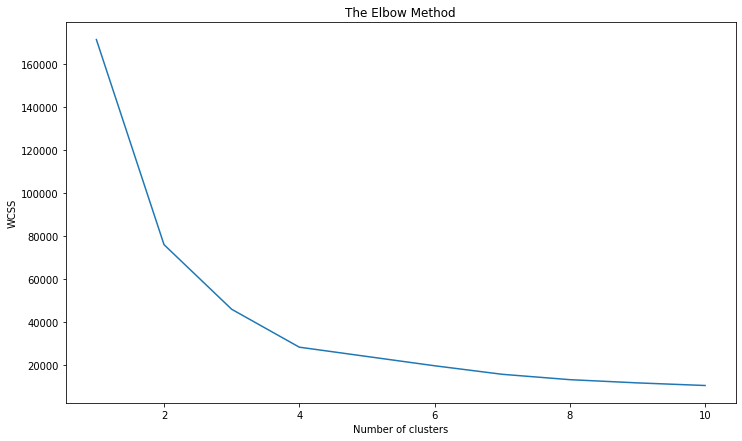

In [14]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(coba1)
    wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,7))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(coba1)

<function matplotlib.pyplot.show(*args, **kw)>

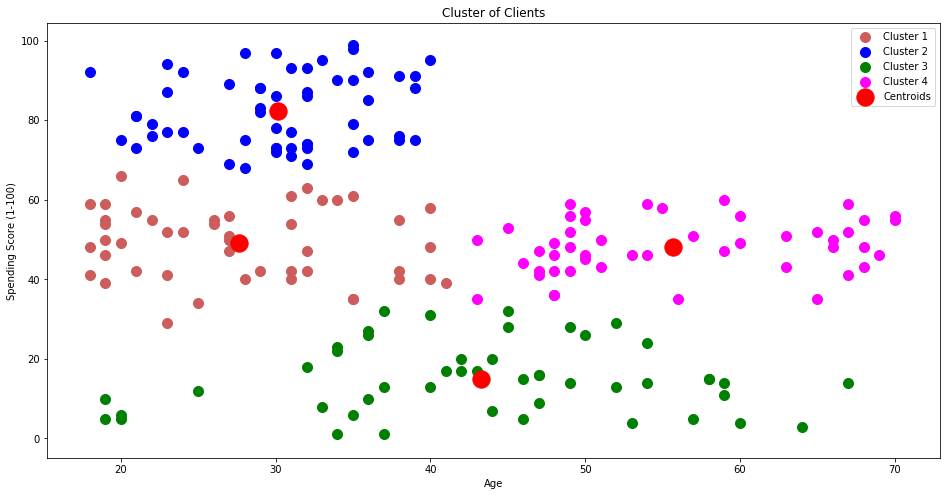

In [17]:
plt.subplots(figsize=(16,8))
plt.scatter(coba1[y_kmeans==0,0],coba1[y_kmeans==0,1],s=100,c='indianred',label='Cluster 1')
plt.scatter(coba1[y_kmeans==1,0],coba1[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(coba1[y_kmeans==2,0],coba1[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(coba1[y_kmeans==3,0],coba1[y_kmeans==3,1],s=100,c='magenta',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show

##### Insight

- This Clustering Analysis gives an insight into target customers based on their age. There are four clusters of target customers based on their Age and Spending Score which are the factors to determine the segments of a customer in a Mall.

- Cluster 1 - Young Average Spenders = Target Customers

- Cluster 2 - Young High Spenders = Priority Customers

- Cluster 3 - Low spenders = Usual Costumers

- Cluster 4 - Old Average spenders = Target Customers

# Final summary

**From above data analysis and clustering techniques we can conclude that:**

- There are four clusters of target customers based on their Age and Spending Score.
- We can clearly see that only young people are involved in High Spending, as age increases people fall into average or low spending category.
- There are five clusters of target customers based on their Annual Income and Spending Score.
- Customers with low and high incomes have highly spending score.
- The most regular customers for the Mall coming from Middle-Aged grouped people.
- In this case, women are Shopping Leaders based on their spending score and category gender visitors.

**Marketing Strategy for Priority Customers Retention:**

- Send a routine email for a launch product from their favorite prestigious brands and a new brand in the mall.
- Give a special privilege in ease of payments, discounts, booking limited edition items, free delivery, etc. 

**Marketing Strategy for Target & Usual Customers:**

- Give information about the privilege they get if they become priority customers. 
- Make a digital survey to get the data of product type, favorite brand, and a purpose that customers looking for.
- Gather the data and do market basket analysis.
- Any insight from the analysis will be testing and see the significant differences before implemented.

I would like to close by mentioning that there is always scope for improvement, I also open to any other constructive comment that will be helped.

<img src="https://media1.tenor.com/images/11554d8a4d8ac1c43222d6808812f581/tenor.gif?itemid=7297560" width="500px">